A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.


The lines that are adjacent to the optimal hyperplane are known as support vectors as these vectors run through the data points that determine the maximal margin.

when the data is not linearly separable, kernel functions are used to transform the data higher-dimensional space to enable linear separation.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/8f/27/3-1_svm_optimal-hyperplane_max-margin_support-vectors-2-1.png" />

In [2]:
import pandas as pd;
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [6]:
print(dir(iris))
iris.feature_names

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris.target

In [17]:
print(iris.target_names)
df['target'].value_counts()

['setosa' 'versicolor' 'virginica']


target
0    50
1    50
2    50
Name: count, dtype: int64

In [19]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

In [27]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


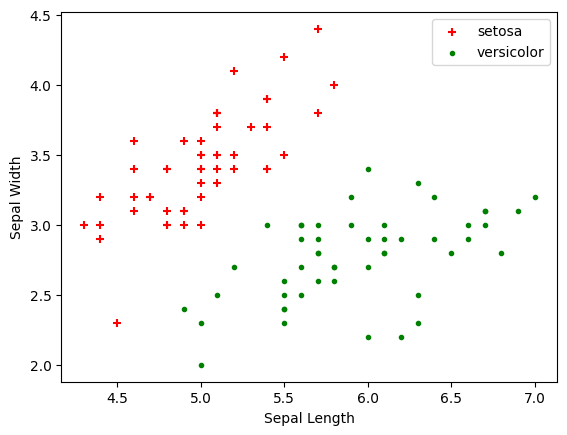

In [30]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='.' ,label='versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

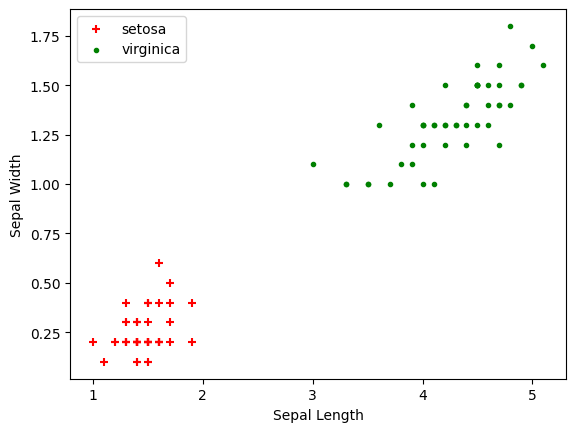

In [33]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+',label='setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='.' ,label='virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

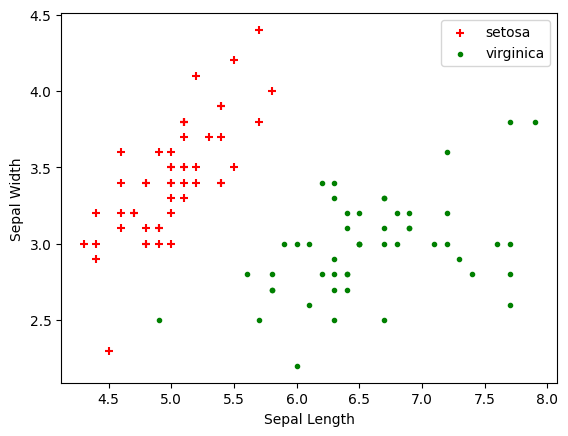

In [31]:

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+',label='setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='.' ,label='virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

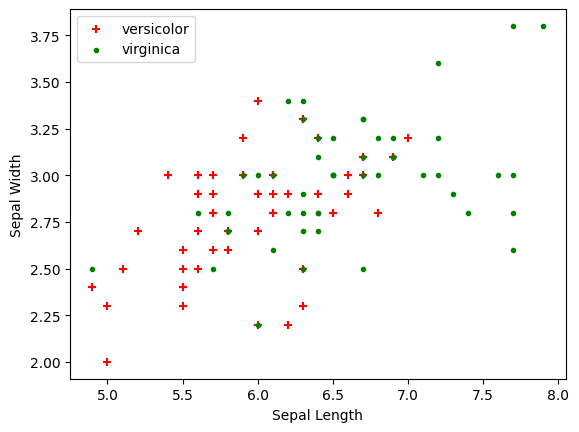

In [32]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+',label='versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='.' ,label='virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','flower_name'],axis=1),df['target'],test_size=0.2)

In [51]:
from sklearn.svm import SVC

In [52]:
model = SVC()

In [53]:
model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [54]:
model.score(X_test,y_test)*100

96.66666666666667